# Google Play Store

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Dataset

In [ ]:
dataset = pd.read_csv("googleplaystore.csv")

In [ ]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Step 2: Data Cleaning:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
dataset.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10126,EZ PZ RPG,FAMILY,3.8,70903,47M,"1,000,000+",Free,0,Everyone 10+,Role Playing,27-Oct-16,2.164.4,2.3 and up
9854,Nike Training Club - Workouts & Fitness Plans,HEALTH_AND_FITNESS,4.6,251618,93M,"10,000,000+",Free,0,Everyone,Health & Fitness,18-Jul-18,5.14.0,5.0 and up
1466,Redfin Real Estate,HOUSE_AND_HOME,4.6,36857,19M,"1,000,000+",Free,0,Everyone,House & Home,25-Jul-18,220,5.0 and up
945,WWE,ENTERTAINMENT,4.5,736864,20M,"10,000,000+",Free,0,Teen,Entertainment,19-Jan-18,3.17.2,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,"50,000,000+",Free,0,Everyone,Business,06-Aug-18,Varies with device,Varies with device
2663,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",SHOPPING,4.5,973270,20M,"50,000,000+",Free,0,Teen,Shopping,06-Aug-18,2.4.9,4.1 and up
3230,Navmii GPS USA (Navfree),TRAVEL_AND_LOCAL,4.0,5960,Varies with device,"500,000+",Free,0,Everyone,Travel & Local,23-May-18,Varies with device,Varies with device
1856,The Walking Dead: Road to Survival,GAME,4.2,522466,37M,"10,000,000+",Free,0,Mature 17+,Role Playing,19-Jun-18,12.0.4.62276,4.0.3 and up
1071,Ecobank Mobile Banking,FINANCE,4.0,12073,42M,"1,000,000+",Free,0,Everyone,Finance,25-May-18,3.3,4.2 and up
7045,Berner Zeitung,NEWS_AND_MAGAZINES,3.4,736,8.5M,"50,000+",Free,0,Teen,News & Magazines,03-Aug-18,7.5.9.1,4.1 and up


### 1. Convert data types for better analysis.

In [ ]:
print(dataset.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
dataset["Price"] = dataset["Price"].str.replace("Everyone","0")
dataset["Price"] = dataset["Price"].str.replace(r"[^\d]", "", regex = True)
dataset["Price"] = pd.to_numeric(dataset["Price"], errors = "coerce")

In [ ]:
dataset["Installs"] = dataset["Installs"].str.replace("Free", "0")
dataset["Installs"] = dataset["Installs"].str.replace(r"[+,]", "", regex = True)
dataset["Installs"] = pd.to_numeric(dataset["Installs"], errors = "coerce")

In [ ]:
dataset["Last Updated"] = pd.to_datetime(dataset["Last Updated"], errors = "coerce")

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\3150061441.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Last Updated"] = pd.to_datetime(dataset["Last Updated"], errors = "coerce")


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  int64         
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


### 2. Handle missing values.

In [ ]:
dataset.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
dataset["Rating"].fillna(dataset["Rating"].median(), inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\2359402858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Rating"].fillna(dataset["Rating"].median(), inplace = True)


In [ ]:
dataset["Type"].fillna(dataset["Type"].mode()[0], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\3914215380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Type"].fillna(dataset["Type"].mode()[0], inplace = True)


In [ ]:
dataset["Content Rating"].fillna(dataset["Content Rating"].mode()[0], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\1281686210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Content Rating"].fillna(dataset["Content Rating"].mode()[0], inplace = True)


In [ ]:
dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\2586708021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace = True)


In [ ]:
dataset["Android Ver"].fillna(dataset["Android Ver"].mode()[0], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\2715166607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Android Ver"].fillna(dataset["Android Ver"].mode()[0], inplace = True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  int64         
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
dataset["Current Ver"].fillna(dataset["Current Ver"].mode()[0], inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\3976232071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Current Ver"].fillna(dataset["Current Ver"].mode()[0], inplace = True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  int64         
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 3 Remove Duplicates: .duplicated()

In [ ]:
dataset.duplicated().sum()

np.int64(483)

In [ ]:
dataset = dataset.drop_duplicates(keep = "first")

In [ ]:
dataset.duplicated().sum()

np.int64(0)

### 4. Detect Outliers and Remove them.

In [ ]:
dataset.describe()

,Rating,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,10358.000000,10358
mean,4.205165,1.415639e+07,103.070091,2017-11-14 10:01:41.486773504
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,19.000000,1.000000e+09,40000.000000,2018-08-08 00:00:00
std,0.506868,8.023580e+07,1627.784252,NaN


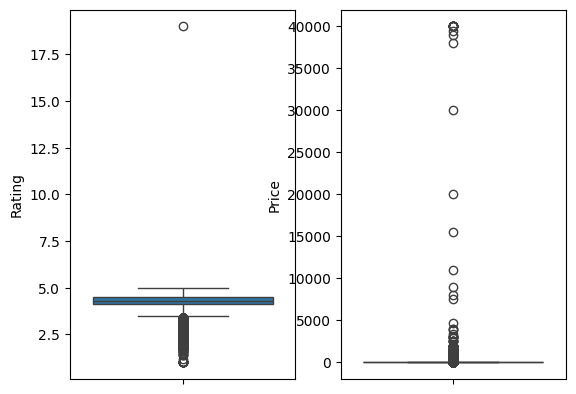

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(dataset["Rating"])
plt.subplot(1,2,2)
sns.boxplot(dataset["Price"])
plt.show()

In [ ]:
(dataset["Rating"]>5).sum()

np.int64(1)

In [ ]:
dataset = dataset[dataset["Rating"]<=5]

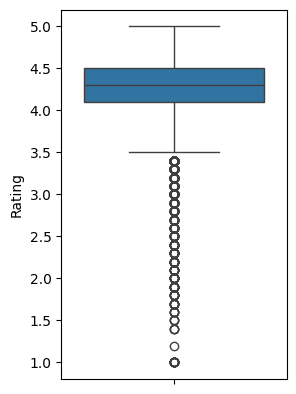

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(dataset["Rating"])
plt.show()

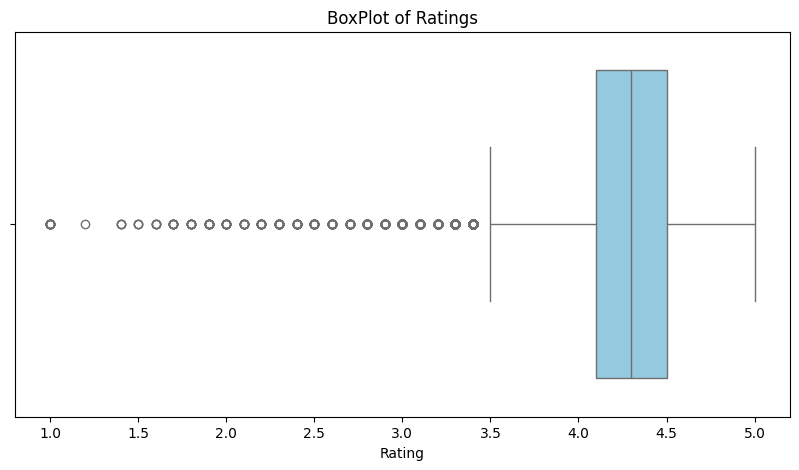

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x=dataset["Rating"], color = "skyblue")
plt.title("BoxPlot of Ratings")
plt.show()

### Capping of Price column outliers using percentile Method

In [ ]:
upper_limit = dataset["Price"].quantile(0.95)
upper_limit

np.float64(199.0)

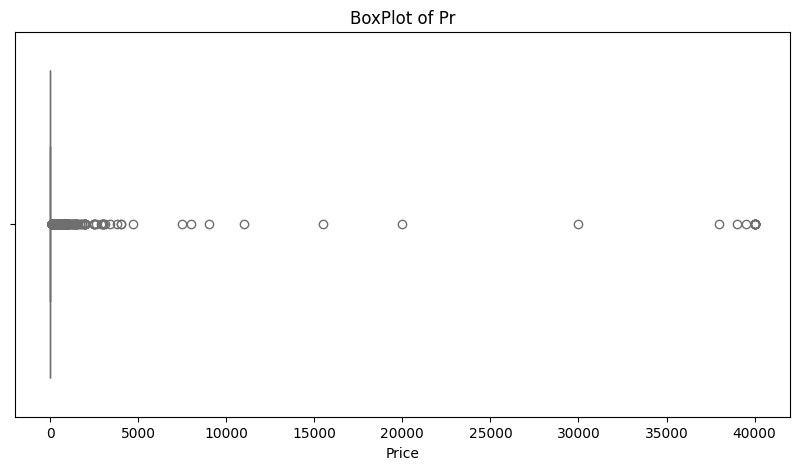

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x=dataset["Price"], color = "skyblue")
plt.title("BoxPlot of Pr")
plt.show()

In [ ]:
dataset["Price"] = dataset["Price"].clip(upper = upper_limit)  # Capping

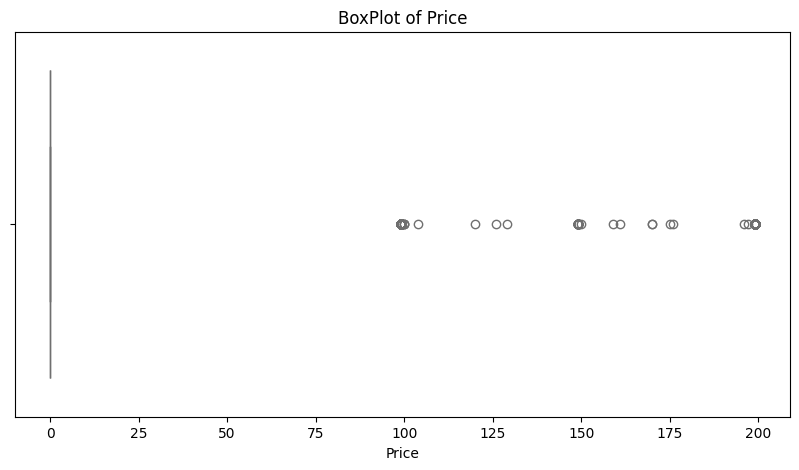

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x=dataset["Price"], color = "skyblue")
plt.title("BoxPlot of Price")
plt.show()

# Step 3. Business Questions for Analysis


## 1. Univariate Analysis (Non-Graphical)

### Q1: What is the average rating of apps on the Play Store?

In [ ]:
avg_rating = dataset["Rating"].mean()
print(f"The average rating of apps on the Play Store is: {avg_rating:.2f}")

The average rating of apps on the Play Store is: 4.20


### Q2: What percentage of apps are free vs paid?

In [ ]:
Total_apps = dataset.shape[0]
Total_apps

10357

In [ ]:
Free_apps = dataset[dataset["Type"] == "Free"].shape[0]
Paid_apps = dataset[dataset["Type"] == "Paid"].shape[0]
Free_apps, Paid_apps

(9592, 765)

In [ ]:
Free_app_Percentage = (Free_apps/Total_apps)*100
Paid_app_Percentage = (Paid_apps/Total_apps)*100

print(f"Free App Percentage : {Free_app_Percentage:.2f}%")
print(f"Paid App Percentage : {Paid_app_Percentage:.2f}%")

Free App Percentage : 92.61%
Paid App Percentage : 7.39%


### Q3: What is the most common app category?

In [ ]:
most_common_app_catogory = dataset["Category"].value_counts()
most_common_app_catogory

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [ ]:
most_common_app_catogory_name = dataset["Category"].value_counts().idxmax()
print(f"The most common app category : {most_common_app_catogory_name}")

The most common app category : FAMILY


# 2. Univariate Visualizations (Categorical Variables)

### Q4: Which app category has the highest number of apps?

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\4142732519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = most_common_app_catogory.index, y = most_common_app_catogory.values, palette = 'dark')


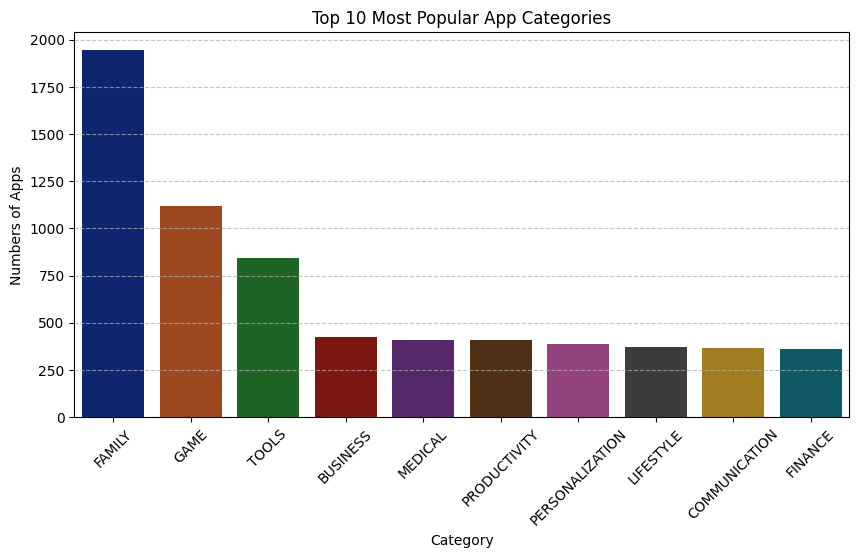

In [ ]:
most_common_app_catogory = dataset["Category"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = most_common_app_catogory.index, y = most_common_app_catogory.values, palette = 'dark')
plt.xticks(rotation = 45)
plt.xlabel("Category")
plt.ylabel("Numbers of Apps")
plt.title("Top 10 Most Popular App Categories")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Q5: What is the distribution of content ratings?

In [ ]:
content_rating = dataset["Content Rating"].shape[0]
content_rating

10357

In [ ]:
content_ratings = dataset["Content Rating"].value_counts()
content_ratings

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\688847463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = content_ratings.index ,y = content_ratings.values, palette = "dark")


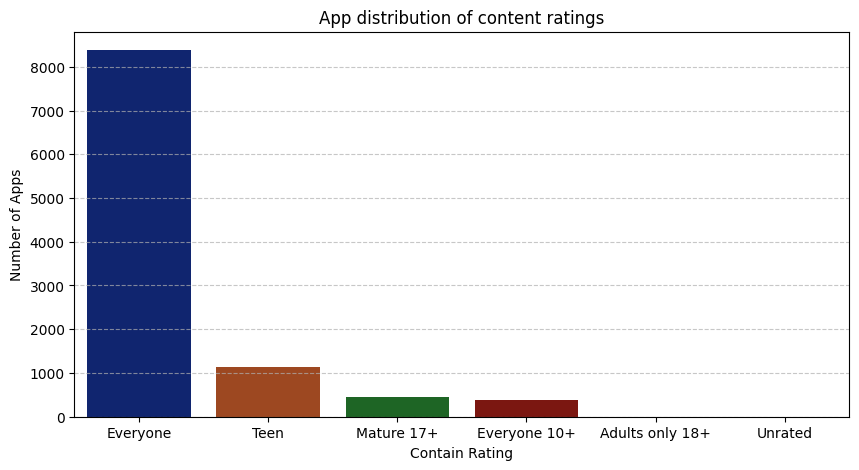

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = content_ratings.index ,y = content_ratings.values, palette = "dark")
plt.xlabel("Contain Rating")
plt.ylabel("Number of Apps")
plt.title("App distribution of content ratings")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

### Q6: How many apps belong to the top 5 most popular categories?

In [ ]:
top_5_most_popular_apps = dataset["Category"].value_counts().head()
top_5_most_popular_apps

Category
FAMILY      1943
GAME        1121
TOOLS        843
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_14016\2545567724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_most_popular_apps.index, y=top_5_most_popular_apps.values, palette = "muted")


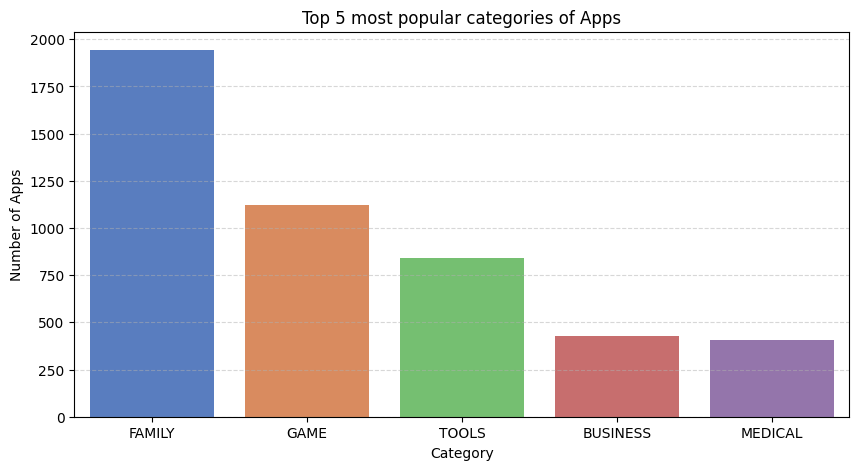

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_5_most_popular_apps.index, y=top_5_most_popular_apps.values, palette = "muted")
plt.ylabel("Number of Apps")
plt.title("Top 5 most popular categories of Apps")
plt.grid(axis="y", linestyle = "--", alpha = 0.5)
plt.show()

# 3. Univariate Visualizations (Numerical Variables)

### Q7: What is the most common rating given to apps?

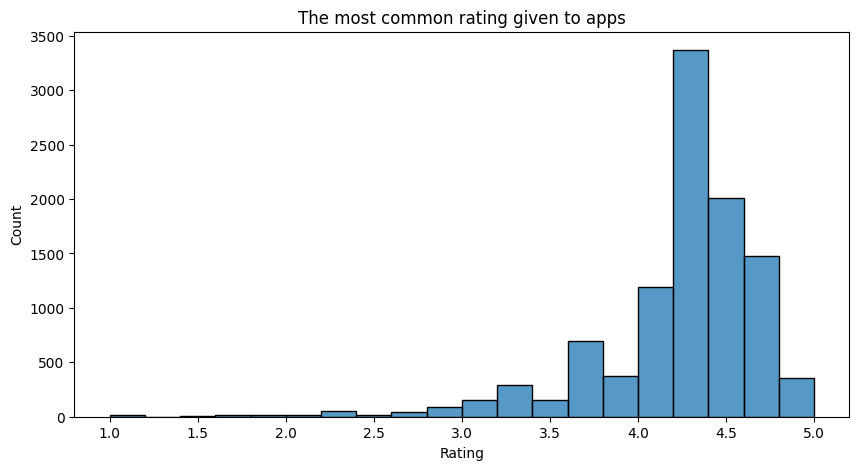

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(dataset["Rating"], bins=20)
plt.title("The most common rating given to apps")
plt.show()

### Q8: How are app prices distributed?

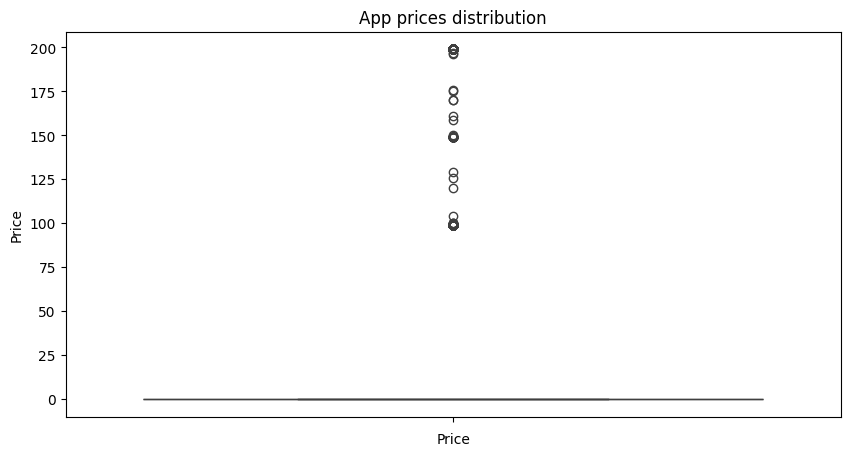

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset["Price"])
plt.title("App prices distribution")
plt.xlabel("Price")
plt.show()

# 4. Bivariate Analysis (Numerical vs Categorical)

### Q9: Do free apps have better ratings than paid apps?

In [ ]:
free_app_avg_rating = dataset[dataset["Type"]=="Free"]["Rating"].mean()
paid_app_avg_rating = dataset[dataset["Type"]=="Paid"]["Rating"].mean()

print(f"Average rating of Free Apps : {free_app_avg_rating:.2f}")
print(f"Average rating of Piad Apps : {paid_app_avg_rating:.2f}")

Average rating of Free Apps : 4.20
Average rating of Piad Apps : 4.27


C:\Users\hp\AppData\Local\Temp\ipykernel_14016\240679966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ratings.keys()), y=list(ratings.values()), palette="muted")


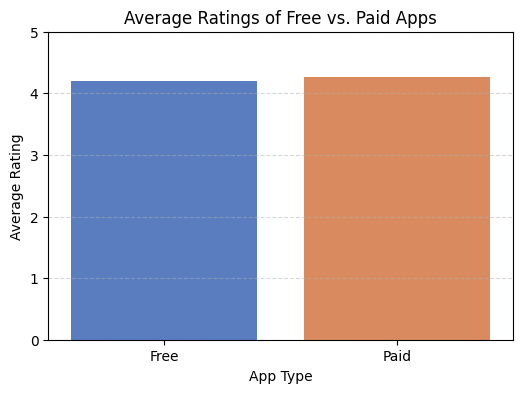

In [ ]:
# Prepare data for plotting
ratings = {"Free": free_app_avg_rating, "Paid": paid_app_avg_rating}

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(ratings.keys()), y=list(ratings.values()), palette="muted")

# Add labels
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.title("Average Ratings of Free vs. Paid Apps")
plt.ylim(0, 5)  # Assuming ratings are on a scale of 0-5
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

### Q10: Which app categories have the highest average ratings?

In [ ]:
category_avg_rating = dataset.groupby("Category") ["Rating"].mean().sort_values(ascending = False)
category_avg_rating.head(10)

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64

# 5. Bivariate Visualizations (Numerical vs Numerical)

### Q11: Does a higher number of installs correlate with higher ratings?

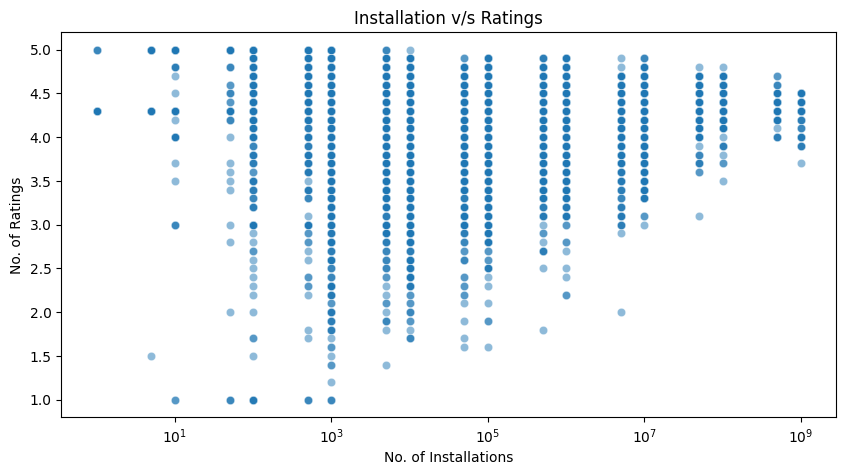

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = dataset["Installs"], y = dataset["Rating"], alpha = 0.5)
plt.xscale("log")
plt.title("Installation v/s Ratings")
plt.xlabel("No. of Installations")
plt.ylabel("No. of Ratings")
plt.show()

### Q12: Do paid apps generate more installs than free apps? [Bivarient Analysis (Numerical vs Numerical)]

In [ ]:
free_installs = dataset[dataset["Type"] == "Free"]["Installs"].mean()
paid_installs = dataset[dataset["Type"] == "Paid"]["Installs"].mean()
print(f"Average Installs (Free Apps): {free_installs:.2f}")
print(f"Average Installs (Paid Apps): {paid_installs:.2f}") #Free apps get significantly more installs.

Average Installs (Free Apps): 15279679.80
Average Installs (Paid Apps): 90491.35


### Q13: Are expensive apps rated higher than free apps?

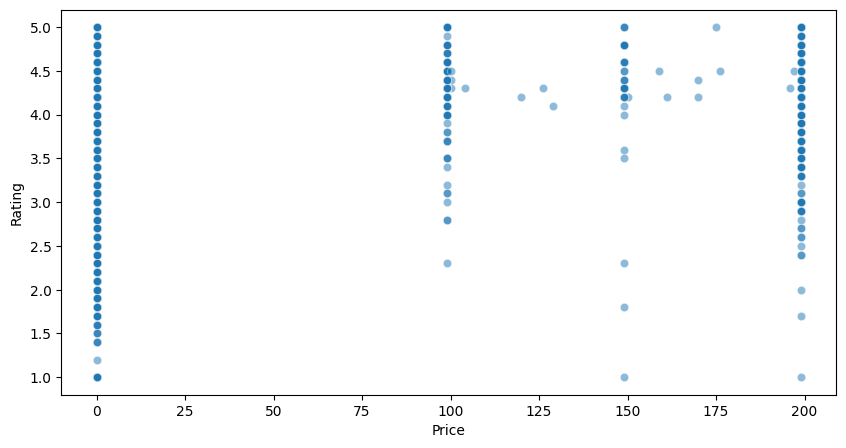

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset["Price"], y=dataset["Rating"], alpha=0.5)
plt.show()

# 6. Bivariate Visualizations (Categorical vs Categorical)

### Q14: Which categories have the most paid apps?

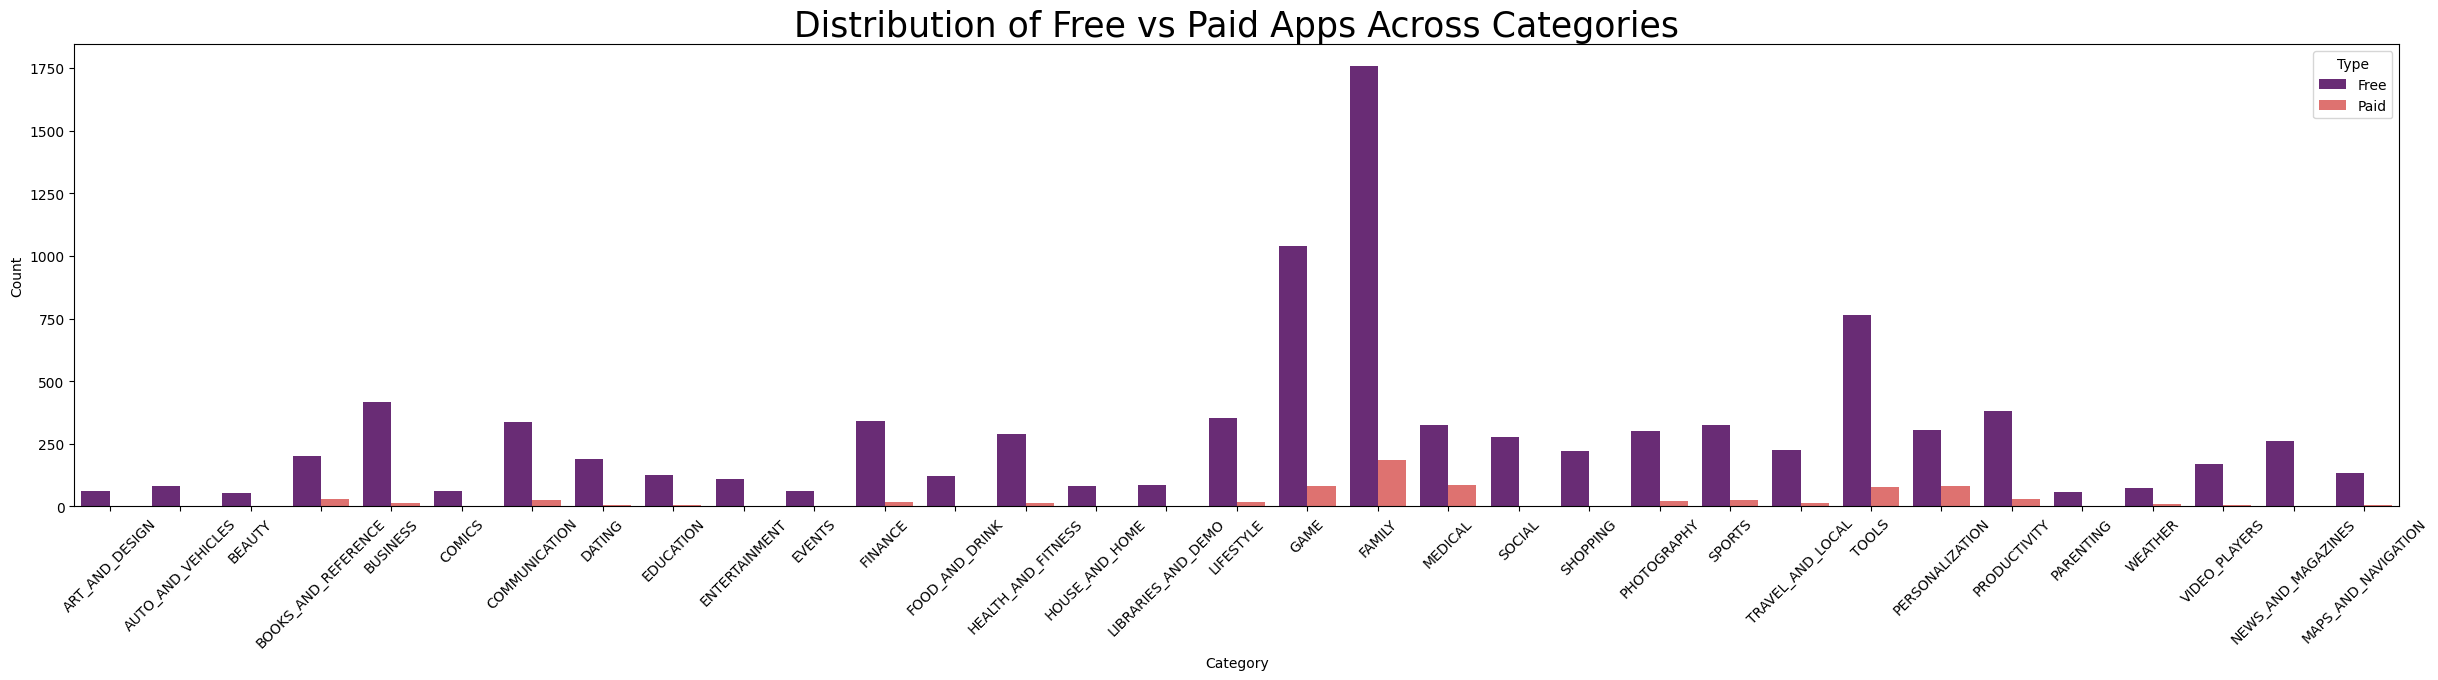

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Category", hue="Type", data=dataset, palette="magma")
plt.xticks(rotation=45)
plt.title("Distribution of Free vs Paid Apps Across Categories",
fontsize=25)
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show() #Games,medical and Family have the most paid apps.